# <u>ANALYSE</u>

## Table of content

## <u>Common codebase and general statistics</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
import random

In [2]:
def print_format_as_percent(number, text = ""):
    if text != "":
        print(text, end = ": ")
    print("{:.2f}%".format(number * 100))

Produce a smaller dataset with only English, German and French (no other languages necessary for our purpose, can easily be extended)

In [3]:
languages = ["English", "German", "French"]

df = pd.read_csv('Data/languages.csv')

reduced_df = df[df['Language'].isin(languages)]
reduced_df.to_csv('Data/minimal_languages.csv', index=False)

Export french only into single csv

In [4]:
french_df = df[df['Language'].isin(["French"])]
french_df.to_csv('Data/french.csv', index=False)

Export german only into single csv

In [5]:
german_df = df[df['Language'].isin(["German"])]
german_df.to_csv('Data/german.csv', index=False)

Export english only into single csv

In [6]:
english_df = df[df['Language'].isin(["English"])]
english_df.to_csv('Data/english.csv', index=False)

Common french statistics regarding data frame

In [7]:
french_df = pd.read_csv('Data/french.csv', encoding='utf-8')

fr_array_of_word_arrays = [word.replace(u'\xa0', u' ').split(" ") for word in french_df['Text']]
fr_number_of_sentences = len(fr_array_of_word_arrays)
fr_number_of_words = sum([len(item) for item in fr_array_of_word_arrays])
fr_number_of_letters = sum(sum([len(word) for word in sentence]) for sentence in fr_array_of_word_arrays)
fr_average_word_length = fr_number_of_letters / fr_number_of_words

print(fr_number_of_sentences)
print(fr_number_of_words)
print(fr_number_of_letters)
print(fr_average_word_length)

1014
23260
124921
5.370636285468616


Common english statistics regarding data frame

In [8]:
english_df = pd.read_csv('Data/english.csv', encoding='utf-8')

eng_array_of_word_arrays = [word.replace(u'\xa0', u' ').split(" ") for word in english_df['Text']]
eng_number_of_sentences = len(eng_array_of_word_arrays)
eng_number_of_words = sum([len(item) for item in eng_array_of_word_arrays])
eng_number_of_letters = sum(sum([len(word) for word in sentence]) for sentence in eng_array_of_word_arrays)
eng_average_word_length = eng_number_of_letters / eng_number_of_words

print(eng_number_of_sentences)
print(eng_number_of_words)
print(eng_number_of_letters)
print(eng_average_word_length)

1385
30382
160611
5.286386676321506


Common german statistics regarding data frame

In [9]:
german_df = pd.read_csv('Data/german.csv', encoding='utf-8')

ger_array_of_word_arrays = [word.replace(u'\xa0', u' ').split(" ") for word in german_df['Text']]
ger_number_of_sentences = len(ger_array_of_word_arrays)
ger_number_of_words = sum([len(item) for item in ger_array_of_word_arrays])
ger_number_of_letters = sum(sum([len(word) for word in sentence]) for sentence in ger_array_of_word_arrays)
ger_average_word_length = ger_number_of_letters / ger_number_of_words

print(ger_number_of_sentences)
print(ger_number_of_words)
print(ger_number_of_letters)
print(ger_average_word_length)

470
5927
29653
5.003036949552894


## <u>Analysis of typical attributes, allowing direct identification of a language</u>

### <u>Special character (french specific)</u>

In [10]:
fr_special_char = ["é", "è", "ê", "à", "â", "ù", "ô", "ç"]

fr_occurence = 0

for sentence in fr_array_of_word_arrays:
    for word in sentence:
        for char in word:
            if char.lower() in fr_special_char:
                fr_occurence += 1

fr_occurence_ratio = fr_occurence / fr_number_of_letters

print(fr_occurence)
print_format_as_percent(fr_occurence_ratio)

4138
3.31%


Analyse occurence rate of special character in german and english (should be very low for attribute to have high entropy value)

In [133]:
english_df = pd.read_csv('Data/english.csv', encoding='utf-8')
german_df = pd.read_csv('Data/german.csv', encoding='utf-8')

eng_occurence = 0
ger_occurence = 0

for sentence in eng_array_of_word_arrays:
    for word in sentence:
        for char in word:
            if char.lower() in fr_special_char:
                eng_occurence += 1

for sentence in ger_array_of_word_arrays:
    for word in sentence:
        for char in word:
            if char.lower() in fr_special_char:
                ger_occurence += 1

eng_occurence_ratio = eng_occurence / eng_number_of_letters
ger_occurence_ratio = ger_occurence / ger_number_of_letters

print("English")
print(eng_occurence)
print_format_as_percent(eng_occurence_ratio)

print()

print("German")
print(ger_occurence)
print_format_as_percent(ger_occurence_ratio)

English
5
0.00%

German
0
0.00%


Very low values (5 for english and 0 for german), therefore the attribute "contains_spec_char" is a good indication if it is french (not containing does not imply that it is not french though, as occurence rate is quite low ~3.28% only)

### <u>Special character (german specific)</u>

In [12]:
ger_special_char = ["ä", "ö", "ü", "ß"]

ger_occurence = 0

for sentence in ger_array_of_word_arrays:
    for word in sentence:
        for char in word:
            if char.lower() in ger_special_char:
                ger_occurence += 1

ger_occurence_ratio = ger_occurence / ger_number_of_letters

print(ger_occurence)
print_format_as_percent(ger_occurence_ratio)

490
1.65%


Analyse occurence rate of special character in french and english (should be very low for attribute to have high entropy value)

In [134]:
english_df = pd.read_csv('Data/english.csv', encoding='utf-8')
french_df = pd.read_csv('Data/german.csv', encoding='utf-8')

eng_occurence = 0
fr_occurence = 0

for sentence in eng_array_of_word_arrays:
    for word in sentence:
        for char in word:
            if char.lower() in ger_special_char:
                eng_occurence += 1

for sentence in fr_array_of_word_arrays:
    for word in sentence:
        for char in word:
            if char.lower() in ger_special_char:
                fr_occurence += 1

eng_occurence_ratio = eng_occurence / eng_number_of_letters
fr_occurence_ratio = fr_occurence / fr_number_of_letters

print("English")
print(eng_occurence)
print_format_as_percent(eng_occurence_ratio)

print()

print("French")
print(fr_occurence)
print_format_as_percent(fr_occurence_ratio)

English
3
0.00%

French
2
0.00%


The english and french language only have a very minimalistic usage of the german "special" character (3 for english and 2 for french), therefore an occurence of one of the german special characters are a very good indication, that the language is german.

We can conclude, that the usage of one of the french special characters (["é", "è", "ê", "à", "â", "ù", "ô", "ç"]) or the usage of one of the german special characters (["ä", "ö", "ü", "ß"]), both non case sensitive, are a very good indicator that the language is french/german (depending on the character).

The french special character only had an occurence rate of ~3.28 %, the german special character only 1.65%.
Therefore, we clearly need further attributes to determine which language a text sample is, in case no special characters occur (either intentionally or unintentionally).

## <u>More global language analysis (no direct identification)</u>

#### <u>Word length repartition, per language, plotted</u>

In [14]:
ger_word_lengths_all = [len(word) for sentence in ger_array_of_word_arrays for word in sentence]
ger_word_lengths = {i: ger_word_lengths_all.count(i) for i in ger_word_lengths_all}
ger_word_lengths = {k: v for k, v in sorted(ger_word_lengths.items(), key=lambda item: item[0])}

eng_word_lengths_all = [len(word) for sentence in eng_array_of_word_arrays for word in sentence]
eng_word_lengths = {i: eng_word_lengths_all.count(i) for i in eng_word_lengths_all}
eng_word_lengths = {k: v for k, v in sorted(eng_word_lengths.items(), key=lambda item: item[0])}

fr_word_lengths_all = [len(word) for sentence in fr_array_of_word_arrays for word in sentence]
fr_word_lengths = {i: fr_word_lengths_all.count(i) for i in fr_word_lengths_all}
fr_word_lengths = {k: v for k, v in sorted(fr_word_lengths.items(), key=lambda item: item[0])}

print(f"German: {ger_word_lengths}")
print(f"English: {eng_word_lengths}")
print(f"French: {fr_word_lengths}")

German: {1: 14, 2: 558, 3: 1543, 4: 1005, 5: 803, 6: 716, 7: 376, 8: 298, 9: 210, 10: 141, 11: 105, 12: 79, 13: 34, 14: 15, 15: 14, 16: 5, 17: 4, 18: 4, 20: 1, 21: 2}
English: {0: 15, 1: 877, 2: 4798, 3: 5136, 4: 4138, 5: 3214, 6: 2437, 7: 2724, 8: 2271, 9: 1777, 10: 1218, 11: 750, 12: 398, 13: 291, 14: 155, 15: 83, 16: 36, 17: 19, 18: 18, 19: 5, 20: 6, 21: 6, 22: 3, 23: 1, 24: 3, 25: 1, 27: 1, 76: 1}
French: {0: 9, 1: 997, 2: 4877, 3: 3138, 4: 2713, 5: 2011, 6: 1719, 7: 1817, 8: 1459, 9: 1512, 10: 993, 11: 686, 12: 458, 13: 349, 14: 223, 15: 153, 16: 64, 17: 25, 18: 19, 19: 12, 20: 10, 21: 4, 22: 2, 23: 1, 24: 3, 26: 1, 27: 3, 29: 1, 32: 1}


Plot using matplotlib

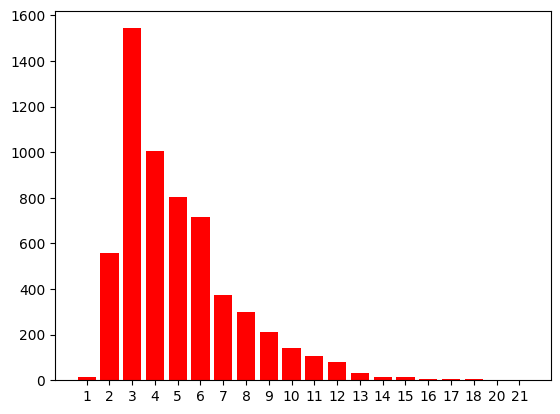

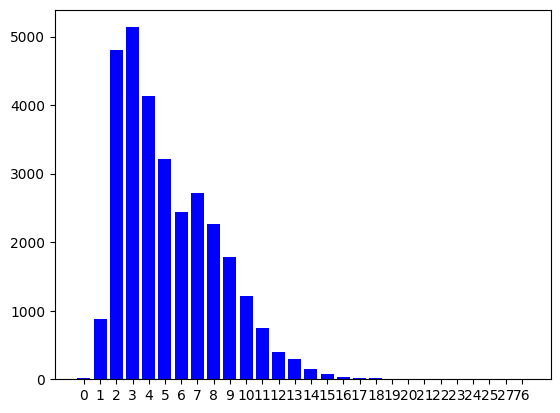

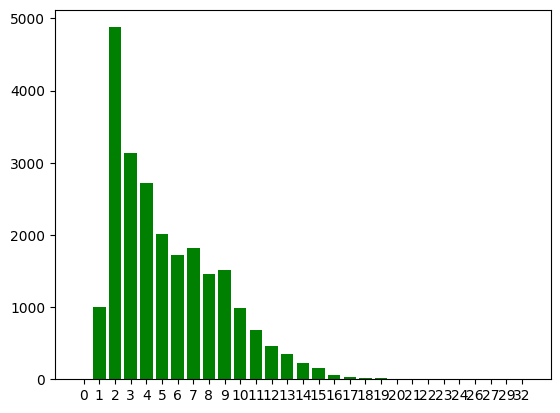

In [15]:
plt.bar(range(len(ger_word_lengths)), list(ger_word_lengths.values()), tick_label=list(ger_word_lengths.keys()), color='r')
plt.show()

plt.bar(range(len(eng_word_lengths)), list(eng_word_lengths.values()), tick_label=list(eng_word_lengths.keys()), color='b')
plt.show()

plt.bar(range(len(fr_word_lengths)), list(fr_word_lengths.values()), tick_label=list(fr_word_lengths.keys()), color='g')
plt.show()

No interesting results from the word length analysis

#### <u>Capital letter of words ratio</u>

Nouns in german start with a capital letter, therefore there should be an increased amount of capital letters, therefore a higher ratio for german compared to the other languages.
If the ratio is high enough, this could be used as an attribute.

In [16]:
ger_capital_words = 0
eng_capital_words = 0
fr_capital_words = 0

for sentence in ger_array_of_word_arrays:
    for word in sentence:
        if len(word) != 0 and word[0].isupper():
            ger_capital_words += 1

for sentence in eng_array_of_word_arrays:
    for word in sentence:
        if len(word) != 0 and word[0].isupper():
            eng_capital_words += 1

for sentence in fr_array_of_word_arrays:
    for word in sentence:
        if len(word) != 0 and word[0].isupper():
            fr_capital_words += 1

ger_capital_words_ratio = ger_capital_words / ger_number_of_words
eng_capital_words_ratio = eng_capital_words / eng_number_of_words
fr_capital_words_ratio = fr_capital_words / fr_number_of_words

print_format_as_percent(ger_capital_words_ratio, "German")
print_format_as_percent(eng_capital_words_ratio, "English")
print_format_as_percent(fr_capital_words_ratio, "French")

German: 23.45%
English: 9.17%
French: 7.34%


We can observe a way higher rate of words starting with a capital letter in german (real rate is probably even higher as the dataset contained falsely lower words).
We now need to to check, if the ratio still work with random samples, to determine if the ratio also applies to smaller subsets of "sentences".

For each language, the average ratio for 10 sentences is computed, the entire experience repeated 100 times per language. The maximum, minimum, average and median values are printed out to determine if this property would be a good attribute.

German random sentence sample capital letter experiment

In [55]:
ger_experiment_results = []

for iteration in range(100):
    sentences_to_test = random.choices(ger_array_of_word_arrays, k=10)
    
    capital_words = 0
    word_count = 0
    for sentence in sentences_to_test:
        for word in sentence:
            word_count += 1
            if len(word) != 0 and word[0].isupper():
                capital_words += 1
    
    capital_words_ratio = capital_words / word_count
    ger_experiment_results.append(round(capital_words_ratio*100, 2))

ger_experiment_results.sort()

ger_min_ratio = min(ger_experiment_results)
ger_max_ratio = max(ger_experiment_results)
ger_avg_ratio = round(sum(ger_experiment_results) / len(ger_experiment_results), 2)
ger_median_ratio = ger_experiment_results[len(ger_experiment_results) // 2]

print(f"German: Min: {ger_min_ratio}\nMedian: {ger_median_ratio}\nAvg: {ger_avg_ratio}\nMax: {ger_max_ratio}")

German: Min: 13.82
Median: 24.32
Avg: 24.31
Max: 35.25


English random sentence sample capital letter experiment

In [78]:
eng_experiment_results = []

for iteration in range(100):
    sentences_to_test = random.choices(eng_array_of_word_arrays, k=10)
    
    capital_words = 0
    word_count = 0
    for sentence in sentences_to_test:
        for word in sentence:
            word_count += 1
            if len(word) != 0 and word[0].isupper():
                capital_words += 1
    
    capital_words_ratio = capital_words / word_count
    eng_experiment_results.append(round(capital_words_ratio*100, 2))

eng_experiment_results.sort()

eng_min_ratio = min(eng_experiment_results)
eng_max_ratio = max(eng_experiment_results)
eng_avg_ratio = round(sum(eng_experiment_results) / len(eng_experiment_results), 2)
eng_median_ratio = eng_experiment_results[len(eng_experiment_results) // 2]

print(f"German: Min: {eng_min_ratio}\nMedian: {eng_median_ratio}\nAvg: {eng_avg_ratio}\nMax: {eng_max_ratio}")

German: Min: 2.82
Median: 8.71
Avg: 8.96
Max: 19.16


French random sentence sample capital letter experiment

In [84]:
fr_experiment_results = []

for iteration in range(100):
    sentences_to_test = random.choices(fr_array_of_word_arrays, k=10)
    
    capital_words = 0
    word_count = 0
    for sentence in sentences_to_test:
        for word in sentence:
            word_count += 1
            if len(word) != 0 and word[0].isupper():
                capital_words += 1
    
    capital_words_ratio = capital_words / word_count
    fr_experiment_results.append(round(capital_words_ratio*100, 2))

fr_experiment_results.sort()

fr_min_ratio = min(fr_experiment_results)
fr_max_ratio = max(fr_experiment_results)
fr_avg_ratio = round(sum(fr_experiment_results) / len(fr_experiment_results), 2)
fr_median_ratio = fr_experiment_results[len(fr_experiment_results) // 2]

print(f"German: Min: {fr_min_ratio}\nMedian: {fr_median_ratio}\nAvg: {fr_avg_ratio}\nMax: {fr_max_ratio}")

German: Min: 1.91
Median: 6.73
Avg: 7.01
Max: 12.24


Our thesis still seems to hold, when analysing the capitalization ratio over several sentences, it seems to be a good indicator, that a given text sample is in german when there is a ratio of 23% or more.

### <u>Common words (filler words) in different languages</u>

Most common words used in the english text samples

In [120]:
eng_words_dict = {}

for sentence in eng_array_of_word_arrays:
    for word in sentence:
        if word not in eng_words_dict:
            eng_words_dict[word] = 1
        else:
            eng_words_dict[word] += 1

eng_words_dict = {k: v for k, v in sorted(eng_words_dict.items(), key=lambda item: item[1], reverse=True)}

eng_words_data = []

for i in range(min(15, len(eng_words_dict.keys()))):
    temp = []
    temp.append(list(eng_words_dict.keys())[i])

    occurence = eng_words_dict[list(eng_words_dict.keys())[i]]
    temp.append(occurence)
    temp.append(round((occurence / eng_number_of_words)*100, 2))
    eng_words_data.append(temp)

print("Most common words in english from the sample:\n" + ", ".join([elem[0] for elem in eng_words_data]))

pd.DataFrame(eng_words_data, columns=["Word", "Occurence", "Percentage"])

Most common words in english from the sample:
the, of, and, to, a, in, is, that, you, as, Wikipedia, for, are, on, by


,Word,Occurence,Percentage
0,the,1362,4.48
1,of,1025,3.37
2,and,824,2.71
3,to,738,2.43
4,a,685,2.25
5,in,572,1.88
6,is,400,1.32
7,that,370,1.22
8,you,300,0.99
9,as,257,0.85


Most common words used in the french text samples

In [121]:
fr_words_dict = {}

for sentence in fr_array_of_word_arrays:
    for word in sentence:
        if word not in fr_words_dict:
            fr_words_dict[word] = 1
        else:
            fr_words_dict[word] += 1

fr_words_dict = {k: v for k, v in sorted(fr_words_dict.items(), key=lambda item: item[1], reverse=True)}

fr_words_data = []

for i in range(min(15, len(fr_words_dict.keys()))):
    temp = []
    temp.append(list(fr_words_dict.keys())[i])

    occurence = fr_words_dict[list(fr_words_dict.keys())[i]]
    temp.append(occurence)
    temp.append(round((occurence / fr_number_of_words)*100, 2))
    fr_words_data.append(temp)

print("Most common words in french from the sample:\n" + ", ".join([elem[0] for elem in fr_words_data]))

pd.DataFrame(fr_words_data, columns=["Word", "Occurence", "Percentage"])

Most common words in french from the sample:
de, la, et, à, des, le, les, en, que, un, vous, est, une, dans, par


,Word,Occurence,Percentage
0,de,1157,4.97
1,la,601,2.58
2,et,522,2.24
3,à,420,1.81
4,des,392,1.69
5,le,386,1.66
6,les,332,1.43
7,en,331,1.42
8,que,298,1.28
9,un,266,1.14


Most common words used in the german text samples

In [122]:
ger_words_dict = {}

for sentence in ger_array_of_word_arrays:
    for word in sentence:
        if word not in ger_words_dict:
            ger_words_dict[word] = 1
        else:
            ger_words_dict[word] += 1

ger_words_dict = {k: v for k, v in sorted(ger_words_dict.items(), key=lambda item: item[1], reverse=True)}

ger_words_data = []

for i in range(min(15, len(ger_words_dict.keys()))):
    temp = []
    temp.append(list(ger_words_dict.keys())[i])

    occurence = ger_words_dict[list(ger_words_dict.keys())[i]]
    temp.append(occurence)
    temp.append(round((occurence / ger_number_of_words)*100, 2))
    ger_words_data.append(temp)

print("Most common words in german from the sample:\n" + ", ".join([elem[0] for elem in ger_words_data]))

pd.DataFrame(ger_words_data, columns=["Word", "Occurence", "Percentage"])

Most common words in german from the sample:
Sie, und, ich, zu, du, das, es, Ich, dass, nicht, ist, in, die, wenn, ein


,Word,Occurence,Percentage
0,Sie,196,3.31
1,und,148,2.50
2,ich,101,1.70
3,zu,98,1.65
4,du,95,1.60
5,das,89,1.50
6,es,86,1.45
7,Ich,85,1.43
8,dass,80,1.35
9,nicht,80,1.35


### Check for occurence rate for most common english words in german and french

In [109]:
ger_occurences_of_eng = {}
fr_occurences_of_eng = {}

for word in eng_words_data:
    if word[0] in fr_words_dict:
        fr_occurences_of_eng[word[0]] = [word[1], fr_words_dict[word[0]], round((word[1] / fr_words_dict[word[0]]), 2)]
    if word[0] in ger_words_dict:
        ger_occurences_of_eng[word[0]] = [word[1], ger_words_dict[word[0]], round((word[1] / ger_words_dict[word[0]]), 2)]

In [110]:
ger_occurences_of_eng_data = []

for i in range(len(ger_occurences_of_eng.keys())):
    temp = []
    temp.append(list(ger_occurences_of_eng.keys())[i])
    temp.append(list(ger_occurences_of_eng.values())[i][0])
    temp.append(list(ger_occurences_of_eng.values())[i][1])
    temp.append(list(ger_occurences_of_eng.values())[i][2])
    ger_occurences_of_eng_data.append(temp)
pd.DataFrame(ger_occurences_of_eng_data, columns=["Word", "Occurence in English", "Occurence in German", "Ratio"])

,Word,Occurence in English,Occurence in German,Ratio
0,in,572,68,8.41


In [111]:
fr_occurences_of_eng_data = []

for i in range(len(fr_occurences_of_eng.keys())):
    temp = []
    temp.append(list(fr_occurences_of_eng.keys())[i])
    temp.append(list(fr_occurences_of_eng.values())[i][0])
    temp.append(list(fr_occurences_of_eng.values())[i][1])
    temp.append(list(fr_occurences_of_eng.values())[i][2])
    fr_occurences_of_eng_data.append(temp)

pd.DataFrame(fr_occurences_of_eng_data, columns=["Word", "Occurence in English", "Occurence in French", "Ratio"])

,Word,Occurence in English,Occurence in French,Ratio
0,of,1025,2,512.50
1,and,824,2,412.00
2,to,738,1,738.00
3,a,685,149,4.60
4,as,257,2,128.50
5,Wikipedia,250,15,16.67
6,for,242,1,242.00
7,on,205,14,14.64


Out of the word list of most common english words from the sample english text set (the, of, and, to, a, in, is, that, you, as, Wikipedia, for, are, on, by), the words:
- "a" (4.6)
- "Wikipedia" (16.67)
- "on" (14.64)

are excluded, because of a too high occurence rate in french (ratio below 100), therefore, classifying a text by using those words could lead to major classification errors.
Furthermore, the word "in" is excluded as well (common word in german, ratio of 8.41).

Therefore, following words will be used to identify a text sample as a text in english when containing any of those words:

the, of, and, to, is, that, you, as, for, are, by


### Check for occurence rate for most common french words in german and english

In [125]:
ger_occurences_of_fr = {}
eng_occurences_of_fr = {}

for word in fr_words_data:
    if word[0] in eng_words_dict:
        eng_occurences_of_fr[word[0]] = [word[1], eng_words_dict[word[0]], round((word[1] / eng_words_dict[word[0]]), 2)]
    if word[0] in ger_words_dict:
        ger_occurences_of_fr[word[0]] = [word[1], ger_words_dict[word[0]], round((word[1] / ger_words_dict[word[0]]), 2)]

In [126]:
ger_occurences_of_fr_data = []

for i in range(len(ger_occurences_of_fr.keys())):
    temp = []
    temp.append(list(ger_occurences_of_fr.keys())[i])
    temp.append(list(ger_occurences_of_fr.values())[i][0])
    temp.append(list(ger_occurences_of_fr.values())[i][1])
    temp.append(list(ger_occurences_of_fr.values())[i][2])
    ger_occurences_of_fr_data.append(temp)
pd.DataFrame(ger_occurences_of_fr_data, columns=["Word", "Occurence in French", "Occurence in German", "Ratio"])

,Word,Occurence in French,Occurence in German,Ratio
0,des,392,4,98.0


In [127]:
eng_occurences_of_fr_data = []

for i in range(len(eng_occurences_of_fr.keys())):
    temp = []
    temp.append(list(eng_occurences_of_fr.keys())[i])
    temp.append(list(eng_occurences_of_fr.values())[i][0])
    temp.append(list(eng_occurences_of_fr.values())[i][1])
    temp.append(list(eng_occurences_of_fr.values())[i][2])
    eng_occurences_of_fr_data.append(temp)
pd.DataFrame(eng_occurences_of_fr_data, columns=["Word", "Occurence in French", "Occurence in English", "Ratio"])

,Word,Occurence in French,Occurence in English,Ratio


Out of the word list of most common french words from the sample french text set (de, la, et, à, des, le, les, en, que, un, vous, est, une, dans, par) only the word "des" occurs in german (but with a ratio of 98). 

Therefore, no words needs to be excluded and all the words of the list will be used to identify a text sample as a text in french when containing any of those words:

de, la, et, à, des, le, les, en, que, un, vous, est, une, dans, par

### Check for occurence rate for most common german words in french and english

In [129]:
fr_occurences_of_ger = {}
eng_occurences_of_ger = {}

for word in ger_words_data:
    if word[0] in eng_words_dict:
        eng_occurences_of_ger[word[0]] = [word[1], eng_words_dict[word[0]], round((word[1] / eng_words_dict[word[0]]), 2)]
    if word[0] in fr_words_dict:
        fr_occurences_of_ger[word[0]] = [word[1], fr_words_dict[word[0]], round((word[1] / fr_words_dict[word[0]]), 2)]

In [131]:
fr_occurences_of_ger_data = []

for i in range(len(fr_occurences_of_ger.keys())):
    temp = []
    temp.append(list(fr_occurences_of_ger.keys())[i])
    temp.append(list(fr_occurences_of_ger.values())[i][0])
    temp.append(list(fr_occurences_of_ger.values())[i][1])
    temp.append(list(fr_occurences_of_ger.values())[i][2])
    fr_occurences_of_ger_data.append(temp)
pd.DataFrame(fr_occurences_of_ger_data, columns=["Word", "Occurence in German", "Occurence in French", "Ratio"])

,Word,Occurence in German,Occurence in French,Ratio
0,du,95,148,0.64
1,es,86,5,17.20


In [132]:
eng_occurences_of_ger_data = []

for i in range(len(eng_occurences_of_ger.keys())):
    temp = []
    temp.append(list(eng_occurences_of_ger.keys())[i])
    temp.append(list(eng_occurences_of_ger.values())[i][0])
    temp.append(list(eng_occurences_of_ger.values())[i][1])
    temp.append(list(eng_occurences_of_ger.values())[i][2])
    eng_occurences_of_ger_data.append(temp)
pd.DataFrame(eng_occurences_of_ger_data, columns=["Word", "Occurence in German", "Occurence in English", "Ratio"])

,Word,Occurence in German,Occurence in English,Ratio
0,in,68,572,0.12


Out of the word list of most common german words from the sample german text set (Sie, und, ich, zu, du, das, es, Ich, dass, nicht, ist, in, die, wenn, ein) the words:
- "du" (0.64) - French
- "es" (17.20) - French
- "in" (0.12) - English

Occur too often in french or english in order to allow a classification through those words ("du" and "in" even occur more often in french or english than in german).

Therefore, following words will be used to identify a text sample as a text in german when containing any of those words:

Sie, und, ich, zu, das, Ich, dass, nicht, ist, die, wenn, ein

## <u>Classification</u>

Order of attributes for classification: <u>condition => yes / no</u>
- hasFrenchSpecificWord => French / next
- hasEnglishSpecificWord => English / next
- hasGermanSpecificWord => German / next
- hasGermanSpecialChar => German / next
- hasFrenchSpecialChar => French / next
- percentageCapitalWordsAbove23 => German / No result

In case the last attribute is not true (therefore all attributes are evaluated to false), the decision tree can't decide wether the language is french, english or german.

The last attribute (Percentage Capital Words Above 23%) often fails for text, that are composed of many small individual sentences (first capital letters) or letters that contain many names, that are capitalized. The usage of this attribute needs to be reavaluated with more sample values.
